# Example use of gore module #
This notebook demonstrates basic use of the gore module to
- Read a fundus image from file
- Produce a map where each pixel of the fundus image has been mapped to a point in the eye
- Produce an interrupted projection of this map (a set of gores) for assembly; we add a "no-cut zone" between gores, so that the gores are connected by a strip to avoid fiddly cutting.

## Gores with image centred at the "equator"
The default behaiour is the position the gores such that they are joined along what would be the equator on a globe.
Import `gore` module and other utilities

In [1]:
import sys  
sys.path.insert(0, './gore')
import gore
from math import pi

Open the example input image and display

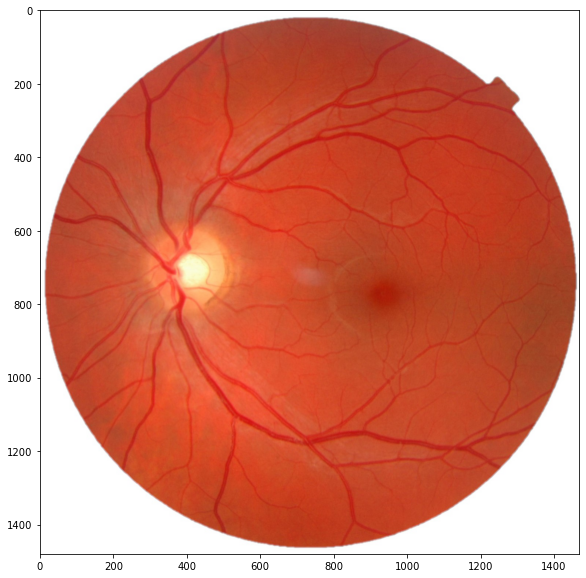

In [2]:
im = gore.openimage('./img/img1.jpg')
gore.fig(im)

Map the image to position in the eye using the simple eye model and get its angular size.

In [3]:
# parameters
focal_length = 24 # crude estimate of focal length

fundus_equi, lammax, phimax = gore.equi(im = im, focal_length = focal_length, alpha_max = gore.deg2rad(32), numpoints = 400)

calculating eye image coordinate positions:   0%|          | 0/399 [00:00<?, ?it/s]

Using the output of the previous function `fundus_equi`, produce a set of six gores using the Cassini projection. We also choose to add a "no-cut zone" at the equator, which is produced using a simple cylindrical projection (Lambert cylindrical equal-area) .

In [4]:
#parameters
num_gores = 6
projection = "cassini" # other projections are available
phi_no_cut = pi / 24 # 7.5 degrees

fundus_gores = gore.make_equatorial(fundus_equi, num_gores = num_gores, projection = projection, 
                         phi_min = -phimax, phi_max = phimax, lam_min = -lammax, 
                         lam_max = lammax, phi_no_cut = phi_no_cut)

goring image rows:   0%|          | 0/400 [00:00<?, ?it/s]

Finally, display and save the resulting gores.

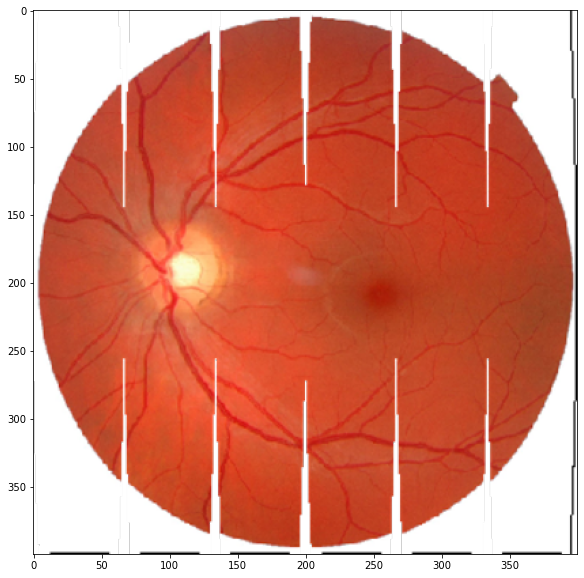

In [5]:
gore.fig(fundus_gores)
fundus_gores.save("fundus_gores.png")

## Joining at the pole
Produce a set of gores joined at the pole. Until now the centre of the fundus image has been centred on the equator of our map of the eye; the function that creates the rotary pattern of gores expects the region of interest to be centred at the "north" pole, so we use the function `swap` to rotate our map of the eye so that it is correctly oriented.

In [6]:
fundus_swapped = gore.swap(fundus_equi, phi_extent = phimax, lam_extent = lammax)

rotating image rows to pole:   0%|          | 0/400 [00:00<?, ?it/s]

Now use `make_polar` to join the gores at the pole:

goring image rows:   0%|          | 0/400 [00:00<?, ?it/s]

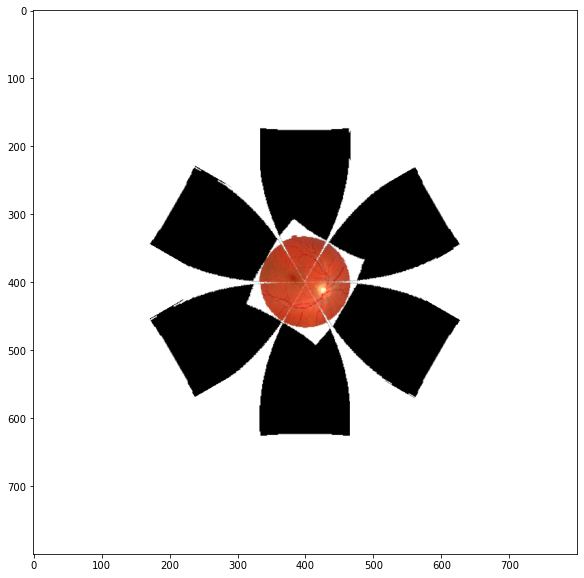

In [7]:
fundus_rotary = gore.make_polar(fundus_swapped, num_gores = 6, 
                          projection="cassini", alpha_limit = gore.deg2rad(100))
fundus_rotary.save("fundus_rotary.png")
gore.fig(fundus_rotary)

Finally, produce a polar cap using a simple projection (azimuthal equidistant) that can be pasted on to the rotary gores, so that there is a region in the centre where no cutting is required.

rotating image rows to pole:   0%|          | 0/400 [00:00<?, ?it/s]

goring image rows:   0%|          | 0/400 [00:00<?, ?it/s]

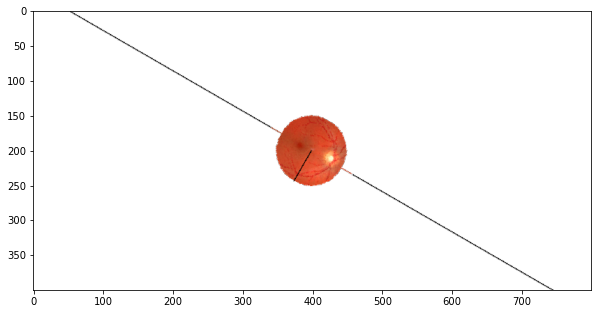

In [8]:
fundus_cap = gore.polecap(fundus_swapped, num_gores=6, phi_cap = pi / 8)
fundus_cap.save("fundus_cap.png")
gore.fig(fundus_cap)